# 이커머스 고객 세분화 분석 아이디어 경진대회
- https://dacon.io/competitions/official/236222/overview/description
### [배경]
안녕하세요 여러분! 월간 데이콘 -이커머스 고객 세분화 분석 아이디어 경진대회에 오신 것을 환영합니다.  

이 대회는 데이터 분석에 열정이 있는 참가자분들께, 

실제 이커머스 환경에서 발생하는 데이터를 통해 고객 세분화의 중요성과 효과를 탐구할 수 있는 기회를 제공합니다.

제공된 이커머스 데이터를 활용하여 고객들을 효과적으로 세분화하고, 그들의 행동 패턴과 구매 경향을 이해함으로써

기업이 더 나은 서비스를 제공할 수 있는 방안을 제시해야 합니다.



### [주제]
이커머스 환경에서 발생한 데이터를 통해 고객 세분화 기법을 사용하여 솔루션 제시



### [설명]
다양한 고객 세분화 기법(RFM 분석, Cohort 분석 등)을 적용하여, 주어진 데이터 내에서 의미 있는 인사이트를 도출하고, 

그 결과를 바탕으로 혁신적인 비즈니스 솔루션을 제안해야 합니다.

---

# 1. 데이터 찾기

In [1]:
# 에러 무시
import warnings
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

### Onlinesales_info.csv [파일]
- 온라인거래와 관련된 정보
- 고객ID : 고객 고유 ID
- 거래ID : 거래 고유 ID
- 거래날짜 : 거래가 이루어진 날짜
- 제품ID : 제품 고유 ID
- 제품카테고리 : 제품이 포함된 카테고리
- 수량 : 주문한 품목 수
- 평균금액 : 수량 1개당 가격 (단위 : 달러)
- 동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음
- 배송료 : 배송비용 (단위 : 달러)
- 쿠폰상태 : 할인쿠폰 적용 상태

In [2]:
Onlinesales_info = pd.read_csv('./data/Onlinesales_info.csv')
Onlinesales_info

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


### Customer_info.csv [파일]
- 고객과 관련된 정보
- 고객ID : 고객 고유 ID
- 성별 : 고객 성별
- 고객지역 : 고객지역
- 가입기간 : 가입기간 (단위 : 월)

In [3]:
Customer_info = pd.read_csv('./data/Customer_info.csv')
Customer_info

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


### Discount_info.csv [파일]
- 할인과 관련된 정보
- 월 : 월(Month) 정보
- 제품카테고리 : 제품이 포함된 카테고리
- 쿠폰코드 : 쿠폰코드
- 할인율 : 해당 쿠폰에 대한 할인율(%)

In [4]:
Discount_info = pd.read_csv('./data/Discount_info.csv')
Discount_info

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


### Marketing_info.csv [파일]
- 마케팅비용과 관련된 정보
- 날짜 : 마케팅이 이루어진 날짜
- 오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)
- 온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)

In [5]:
Marketing_info = pd.read_csv('./data/Marketing_info.csv')
Marketing_info

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


### Tax_info.csv [파일]
- 세금과 관련된 정보
- 제품 카테고리 : 제품이 포함된 카테고리
- GST : Goods and Services Tax(%)

In [6]:
Tax_info = pd.read_csv('./data/Tax_info.csv')
Tax_info

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


---

# 2. 문제 정의

- 이커머스 환경에서 발생한 데이터를 통해 고객 세분화 기법을 사용하여 솔루션 제시
- 고객의 행동 패턴과 구매 경향을 이해함으로써 기업이 더 나은 서비스를 제공할 수 있는 방안을 제시

---

# 3. 분석하기

## RFM segmentation
- Recency : 얼마나 최근에 구매했는가 (최근성)
- Frequency : 얼마나 자주 구매했는가 (빈도)
- Monetary : 얼마나 많은 금액을 지출했는가 (금액)

사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인하거나 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법입니다.

In [7]:
RFM_df = Onlinesales_info[['고객ID', '거래날짜', '수량', '평균금액']]
RFM_df

,고객ID,거래날짜,수량,평균금액
0,USER_1358,2019-01-01,1,153.71
1,USER_1358,2019-01-01,1,153.71
2,USER_1358,2019-01-01,1,2.05
3,USER_1358,2019-01-01,5,17.53
4,USER_1358,2019-01-01,1,16.50
...,...,...,...,...
52919,USER_0504,2019-12-31,1,121.30
52920,USER_0504,2019-12-31,1,48.92
52921,USER_0504,2019-12-31,1,151.88
52922,USER_0562,2019-12-31,5,80.52


In [8]:
# 제품 구매 고객의 수
len(RFM_df['고객ID'].unique())

1468

1,468명의 고객 데이터를 바탕으로 분석을 진행합니다.

'평균금액' 컬럼은 물건 1개당의 가격이므로 '구매금액' 컬럼을 새로 만들어줍니다.

In [9]:
RFM_df['구매금액'] = RFM_df['평균금액'] * RFM_df['수량']
RFM_df

,고객ID,거래날짜,수량,평균금액,구매금액
0,USER_1358,2019-01-01,1,153.71,153.71
1,USER_1358,2019-01-01,1,153.71,153.71
2,USER_1358,2019-01-01,1,2.05,2.05
3,USER_1358,2019-01-01,5,17.53,87.65
4,USER_1358,2019-01-01,1,16.50,16.50
...,...,...,...,...,...
52919,USER_0504,2019-12-31,1,121.30,121.30
52920,USER_0504,2019-12-31,1,48.92,48.92
52921,USER_0504,2019-12-31,1,151.88,151.88
52922,USER_0562,2019-12-31,5,80.52,402.60


In [10]:
# 고객ID로 그룹화하여 고객별 구매수량, 구매금액 계산
user_grp = RFM_df.groupby('고객ID')[['수량', '구매금액']].sum()
user_grp

,수량,구매금액
고객ID,,
USER_0000,3,30.99
USER_0001,342,13834.90
USER_0002,209,1442.12
USER_0003,21,1360.07
USER_0004,56,1442.47
...,...,...
USER_1463,46,544.34
USER_1464,141,2363.05
USER_1465,10,101.56


In [11]:
print('고객별 구매수량 :', user_grp['수량'].mean())
print('고객별 구매금액 :', user_grp['구매금액'].mean())

고객별 구매수량 : 162.14782016348775
고객별 구매금액 : 3181.740204359674


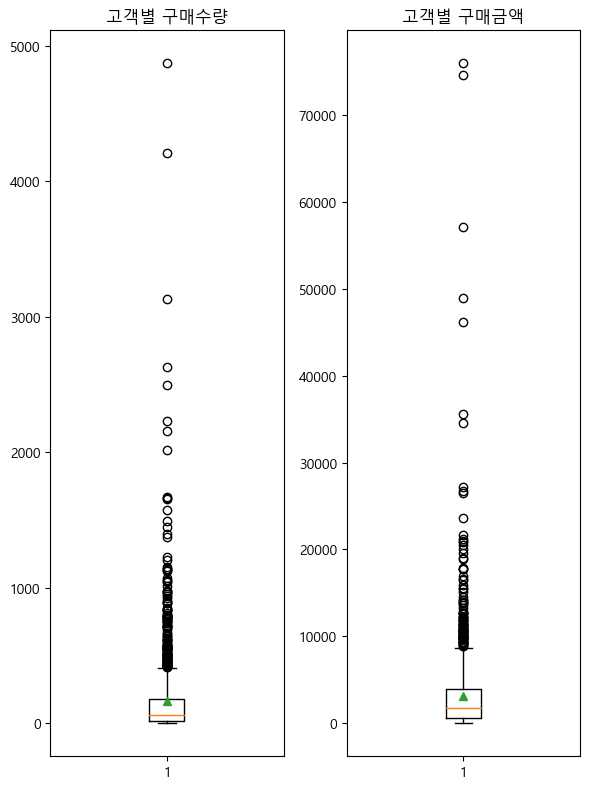

In [12]:
plt.figure(figsize=(6, 8))

plt.subplot(1, 2, 1)
plt.title('고객별 구매수량')
plt.boxplot(user_grp['수량'], showmeans=True)

plt.subplot(1, 2, 2)
plt.title('고객별 구매금액')
plt.boxplot(user_grp['구매금액'], showmeans=True)

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

사용자 그룹을 분류하기 위해 기준을 세워줍니다.
- Recency : 2020-01-01일 기준으로 최근 한 달이내에 결제되었는가?
- Frequency : 150회 이상 구매하였는가?
- Monetary : 3000달러 이상 구매하였는가?

고객별 평균 구매 수량과 금액을 참고하여 기준을 세운 뒤, 각 컬럼을 아래와 같이 분류합니다.
- Recency : 2020-01-01일 기준으로 한 달 이내에 구매 기록이 있으면 ‘recent’ 이외는 ‘past’
- Frequency : 150회 이상 구매시 ‘high’, 3회 미만 구매시 ‘low’
- Monetary : 3000달러 이상 구매시 ‘high’, 500달러 미만 구매시 ‘low’

In [13]:
def last_date(USER_ID):
    return RFM_df[RFM_df['고객ID'] == USER_ID]['거래날짜'].max()

last_date('USER_0000')

'2019-09-15'

In [14]:
user_last_date = []

for i in user_grp.index:
    user_last_date.append(last_date(i))

In [15]:
RFM = user_grp.copy()
RFM['최근구매일'] = user_last_date
RFM = RFM[['최근구매일', '수량', '구매금액']]
RFM

,최근구매일,수량,구매금액
고객ID,,,
USER_0000,2019-09-15,3,30.99
USER_0001,2019-11-02,342,13834.90
USER_0002,2019-10-19,209,1442.12
USER_0003,2019-12-14,21,1360.07
USER_0004,2019-09-15,56,1442.47
...,...,...,...
USER_1463,2019-04-05,46,544.34
USER_1464,2019-10-05,141,2363.05
USER_1465,2019-06-20,10,101.56


In [16]:
RFM_recency = lambda x: 'recent' if x >= '2019-12-01' else 'past'
RFM_frequency = lambda x: 'high' if x >= 150 else 'row'
RFM_monetary = lambda x: 'high' if x >= 3000 else 'row'

In [17]:
RFM['최근구매일'] = RFM['최근구매일'].apply(RFM_recency)
RFM['수량'] = RFM['수량'].apply(RFM_frequency)
RFM['구매금액'] = RFM['구매금액'].apply(RFM_monetary)

In [18]:
RFM

,최근구매일,수량,구매금액
고객ID,,,
USER_0000,past,row,row
USER_0001,past,high,high
USER_0002,past,high,row
USER_0003,recent,row,row
USER_0004,past,row,row
...,...,...,...
USER_1463,past,row,row
USER_1464,past,row,row
USER_1465,past,row,row


In [19]:
# 충성도가 높은 고객
RFM[(RFM['최근구매일'] == 'recent') & (RFM['수량'] == 'high') & (RFM['구매금액'] == 'high')]

,최근구매일,수량,구매금액
고객ID,,,
USER_0033,recent,high,high
USER_0057,recent,high,high
USER_0062,recent,high,high
USER_0076,recent,high,high
USER_0077,recent,high,high
...,...,...,...
USER_1391,recent,high,high
USER_1397,recent,high,high
USER_1411,recent,high,high


한 달이내에 제품을 구매했고, 구매 수량과 금액이 다른 고객들의 평균치보다 높은 `충성도가 높은 고객`입니다.

In [20]:
# 떠나간 VIP
RFM[(RFM['최근구매일'] == 'past') & (RFM['수량'] == 'high') & (RFM['구매금액'] == 'high')]

,최근구매일,수량,구매금액
고객ID,,,
USER_0001,past,high,high
USER_0006,past,high,high
USER_0008,past,high,high
USER_0009,past,high,high
USER_0026,past,high,high
...,...,...,...
USER_1433,past,high,high
USER_1435,past,high,high
USER_1439,past,high,high


In [21]:
# 비활성고객, 잠재고객
RFM[(RFM['최근구매일'] == 'past') & (RFM['수량'] == 'row') & (RFM['구매금액'] == 'row')]

,최근구매일,수량,구매금액
고객ID,,,
USER_0000,past,row,row
USER_0004,past,row,row
USER_0005,past,row,row
USER_0010,past,row,row
USER_0011,past,row,row
...,...,...,...
USER_1462,past,row,row
USER_1463,past,row,row
USER_1464,past,row,row


In [22]:
RFM

,최근구매일,수량,구매금액
고객ID,,,
USER_0000,past,row,row
USER_0001,past,high,high
USER_0002,past,high,row
USER_0003,recent,row,row
USER_0004,past,row,row
...,...,...,...
USER_1463,past,row,row
USER_1464,past,row,row
USER_1465,past,row,row


## K-Mean

In [23]:
RFM = user_grp.copy()
RFM['최근구매일'] = user_last_date
RFM = RFM[['최근구매일', '수량', '구매금액']]
RFM

,최근구매일,수량,구매금액
고객ID,,,
USER_0000,2019-09-15,3,30.99
USER_0001,2019-11-02,342,13834.90
USER_0002,2019-10-19,209,1442.12
USER_0003,2019-12-14,21,1360.07
USER_0004,2019-09-15,56,1442.47
...,...,...,...
USER_1463,2019-04-05,46,544.34
USER_1464,2019-10-05,141,2363.05
USER_1465,2019-06-20,10,101.56


In [24]:
RFM['최근구매일'] = pd.to_datetime(RFM['최근구매일'])  # 날짜 데이터를 object -> datetime으로 변환
RFM['경과일'] = (pd.to_datetime('2020-01-01') - RFM['최근구매일']).dt.days
RFM = RFM.drop(columns=['최근구매일'])
RFM

,수량,구매금액,경과일
고객ID,,,
USER_0000,3,30.99,108
USER_0001,342,13834.90,60
USER_0002,209,1442.12,74
USER_0003,21,1360.07,18
USER_0004,56,1442.47,108
...,...,...,...
USER_1463,46,544.34,271
USER_1464,141,2363.05,88
USER_1465,10,101.56,195


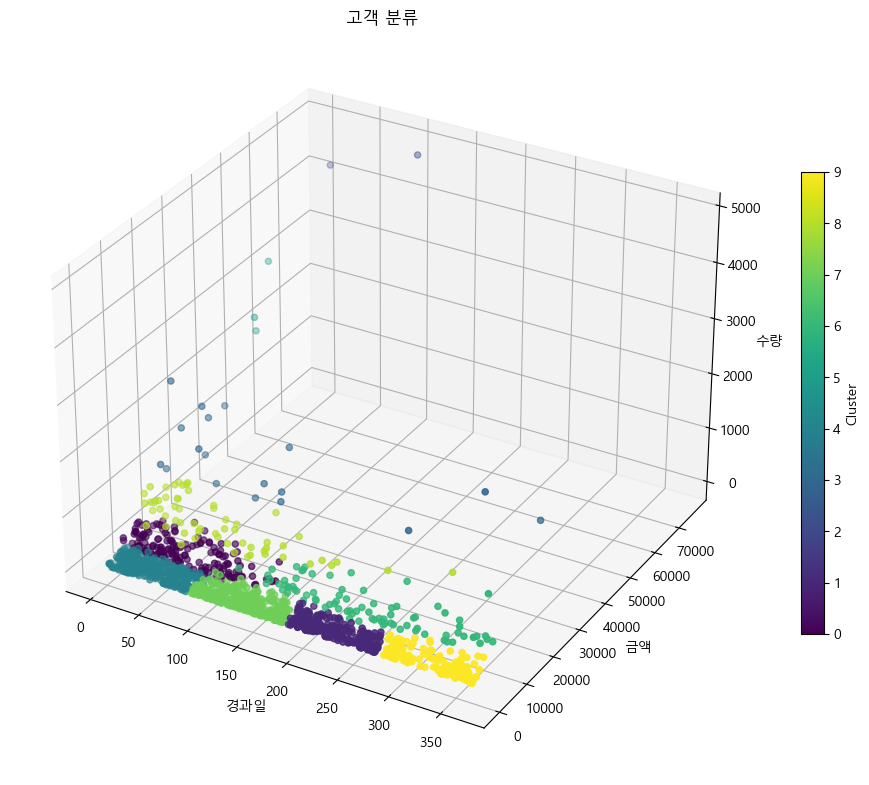

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 데이터 정규화
scaler = StandardScaler()
scaled_RFM = scaler.fit_transform(RFM)

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_RFM)
labels = kmeans.labels_

# 군집화 결과를 데이터프레임에 추가
RFM['Cluster'] = labels

# 3D 산점도 시각화
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RFM['경과일'], RFM['구매금액'], RFM['수량'], c=RFM['Cluster'], cmap='viridis')
ax.set_xlabel('경과일')
ax.set_ylabel('금액')
ax.set_zlabel('수량')
ax.set_title('고객 분류')

# 컬러바 추가
cbar = plt.colorbar(scatter, shrink=0.5)
cbar.set_label('Cluster')
plt.show()

## 코호트 분석(Cohort Analysis)

In [26]:
Customer_info = pd.read_csv('./data/Customer_info.csv')
Customer_info

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [27]:
Customer_info['가입기간'].describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: 가입기간, dtype: float64

In [28]:
user_cnt = Customer_info.groupby('가입기간')['고객ID'].count()
elapsed_date = user_cnt.index

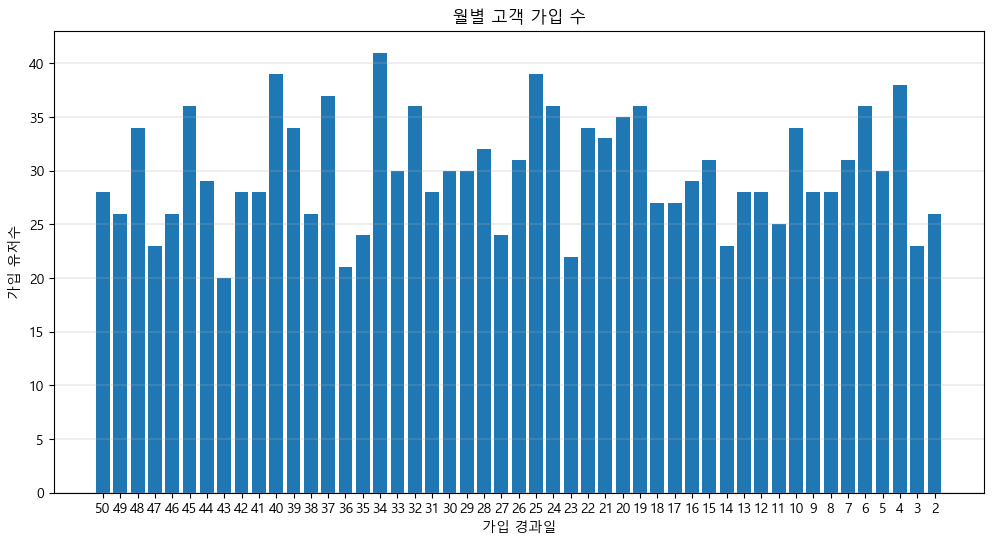

In [29]:
plt.figure(figsize=(12, 6))

plt.bar(elapsed_date, user_cnt)

# x축 뒤집기
plt.gca().invert_xaxis()

plt.title('월별 고객 가입 수')
plt.xlabel('가입 경과일')
plt.ylabel('가입 유저수')
plt.xticks(elapsed_date)
plt.grid(axis='y', linewidth=0.3)

plt.show()

In [41]:
Customer_info = pd.read_csv('./data/Customer_info.csv')
Customer_info

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [51]:
Onlinesales_info[Onlinesales_info['고객ID'] == 'USER_0034']

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
1442,USER_0034,Transaction_0759,2019-01-11,Product_0935,Office,2,18.56,6.50,Clicked
1443,USER_0034,Transaction_0759,2019-01-11,Product_0936,Office,2,29.91,6.50,Clicked
1444,USER_0034,Transaction_0759,2019-01-11,Product_0938,Office,1,41.26,6.50,Not Used
1445,USER_0034,Transaction_0760,2019-01-11,Product_0880,Drinkware,1,3.08,6.50,Clicked
1446,USER_0034,Transaction_0760,2019-01-11,Product_1000,Waze,1,19.59,6.50,Used
...,...,...,...,...,...,...,...,...,...
44211,USER_0034,Transaction_19978,2019-10-30,Product_0917,Lifestyle,40,2.80,12.91,Used
44212,USER_0034,Transaction_19978,2019-10-30,Product_0918,Lifestyle,20,2.80,12.91,Used
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked
44214,USER_0034,Transaction_19980,2019-10-30,Product_0983,Nest-USA,1,119.00,6.50,Used


In [44]:
Customer_info[Customer_info['가입기간'] == 2]

,고객ID,성별,고객지역,가입기간
70,USER_0034,여,New Jersey,2
83,USER_1015,남,California,2
283,USER_0832,여,Chicago,2
334,USER_1311,남,Chicago,2
464,USER_0270,남,Chicago,2
509,USER_0732,여,Chicago,2
537,USER_1306,여,New York,2
623,USER_1320,여,California,2
654,USER_1026,여,Chicago,2
694,USER_0750,남,New York,2


코호트 분석을 해보려 했으나, 데이터에 오류가 있어서 진행하지 못했다.

'UESR_0034'고객을 예시로 들면, 이 고객은 가입한 지 2개월 됐는데, 구매 내역을 보면 최초 구매일이 2019-01월이고, 마지막 구매일이 2019-10월이다.

---

# 4. 보고서 작성